In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.structural import UnobservedComponents
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = ["SimHei"]  # 适用于 Windows
plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示问题

# 1. 读取数据
file_path = r"C:\Users\rog\Desktop\CPI.csv"
df = pd.read_csv(file_path, encoding="gbk")

# 确保时间格式正确
df['日期'] = pd.to_datetime(df['日期'])
df.set_index('日期', inplace=True)

# 2. 进行季节性调整（使用基本结构模型 BSM）
import pandas as pd
import statsmodels.api as sm

adjusted_cpi = pd.DataFrame(index=df.index)

for country in df.columns:
    results = sm.tsa.x13_arima_analysis(df[country])
    adjusted_cpi[country] = results.seasadj  # 季节调整后的数据


# 3. 计算对数环比增长率
log_diff_cpi = np.log(adjusted_cpi).diff().dropna()

# 4. 绘制部分结果
plt.figure(figsize=(12, 6))
for country in log_diff_cpi.columns[:5]:  # 仅展示前5个国家
    plt.plot(log_diff_cpi.index, log_diff_cpi[country], label=country)

plt.legend()
plt.title("对数环比增长率 (部分国家)")
plt.xlabel("时间")
plt.ylabel("对数环比增长率")
plt.grid()
plt.show()

# 5. 保存处理后的数据
output_path = r"C:\Users\rog\Desktop\CPI_adjusted.csv"
log_diff_cpi.to_csv(output_path)
print(f"处理后的数据已保存至 {output_path}")




X13NotFoundError: x12a and x13as not found on path. Give the path, put them on PATH, or set the X12PATH or X13PATH environmental variable.

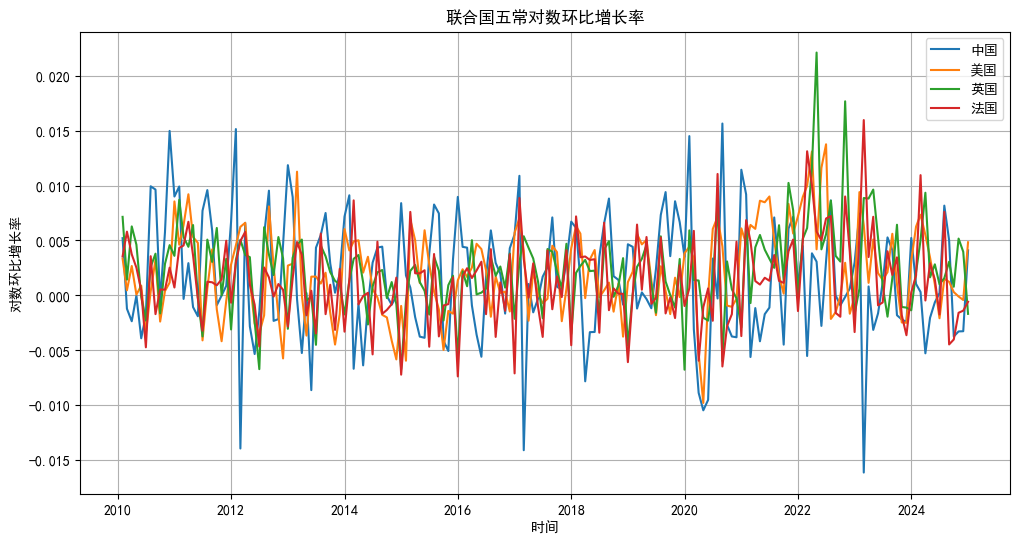

In [12]:
# 选择联合国五常的数据
p5_countries = ["中国", "美国",  "英国", "法国"]
p5_cpi = log_diff_cpi[p5_countries]

# 绘制折线图
plt.figure(figsize=(12, 6))
for country in p5_cpi.columns:
    plt.plot(p5_cpi.index, p5_cpi[country], label=country)

plt.legend()
plt.title("联合国五常对数环比增长率")
plt.xlabel("时间")
plt.ylabel("对数环比增长率")
plt.grid()
plt.show()


In [14]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

# 记录不平稳的国家
non_stationary_countries = []

for country in log_diff_cpi.columns:
    series = log_diff_cpi[country].dropna()  # 移除 NaN
    if len(series) < 10:  # 样本数太少，跳过
        continue
    if np.isinf(series).any():  # 如果存在 Inf，跳过
        continue
    try:
        adf_test = adfuller(series)
        p_value = adf_test[1]  # 获取 p 值
        if p_value > 0.05:
            non_stationary_countries.append(country)
    except np.linalg.LinAlgError:
        print(f"跳过 {country}，因为 SVD 计算失败")
    except Exception as e:
        print(f"跳过 {country}，错误: {e}")

# 输出不平稳的国家
print("不平稳的国家:", non_stationary_countries)


不平稳的国家: ['阿尔巴尼亚', '安哥拉', '亚美尼亚', '奥地利', '阿塞拜疆', '孟加拉国', '波斯尼亚和黑塞哥维那', '文莱', '布基纳法索', '喀麦隆', '加拿大', '中国', '哥伦比亚', '塞浦路斯', '捷克共和国', '丹麦', '斯威士兰', '埃塞俄比亚', '芬兰', '法国', '冈比亚', '德国', '加纳', '希腊', '海地', '中国香港特别行政区', '冰岛', '印度', '印度尼西亚', '爱尔兰', '以色列', '意大利', '牙买加', '日本', '科威特', '拉脱维亚', '黎巴嫩', '利比里亚', '卢森堡', '中国澳门特别行政区', '马拉维', '马耳他', '墨西哥', '毛里求斯', '摩洛哥', '莫桑比克', '尼泊尔', '荷兰', '尼日利亚', '马其顿', '挪威', '巴基斯坦', '葡萄牙', '卡塔尔', '圣文森特和格林纳丁斯', '圣多美和普林西比', '塞内加尔', '塞拉利昂', '新加坡', '斯洛文尼亚', '西班牙', '巴勒斯坦被占领土', '苏丹', '瑞典', '瑞士', '坦桑尼亚', '多哥', '突尼斯', '乌克兰', '英国', '美国', '乌拉圭', '津巴布韦']
